# Copyright (c) 2017 Anthony De Meulemeester 

# Part 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD 
from sklearn.preprocessing import normalize 

from ml_helpers import * 

# Loading data

In [2]:
df = pd.read_csv('giskard_dataset.csv', delimiter=';')
df.head()


,Unnamed: 0,Target,Message
0,0,internal company policy,Message-ID: <32715630.1075840547840.JavaMail.e...
1,1,alliances / partnerships,Message-ID: <8721012.1075863428380.JavaMail.ev...
2,2,internal company operations,Message-ID: <8687721.1075852656109.JavaMail.ev...
3,3,internal company operations,Message-ID: <16562450.1075846168630.JavaMail.e...
4,4,internal projects -- progress and strategy,Message-ID: <955111.1075858690252.JavaMail.eva...


# Lets create a new frame with the data we need.

In [3]:
email_df = pd.DataFrame(parse_into_emails(df.Message))
email_df

,body,to,from_
0,Enron Wholesale Services - Office of the Chair...,"GILBERT-SMITH, DOUGLAS","Mark Frevert, Chairman & CEO"
1,"-----Original Message-----Vince,FYI,Gwyn-----O...","Hudler, Cindy","Koepke, Gwyn"
2,"John Brindle, David Cromley and others in the ...",Steven J Kean/NA/Enron@Enron,David Cromley@ENRON COMMUNICATIONS on 06/12/20...
3,Yes. Contact either Gia or John and get the b...,"Govt Affairs (w/Assts), Mark Palmer/Corp/Enron...",steven.kean@enron.com
4,"breasoner@gibbs-bruns.com, mlk@pkns.com, gferg...",gfergus@brobeck.com@SMTP; Tim Belden; Susan J ...,Alan Comnes
...,...,...,...
874,include on the distribution list and send out ...,"""'skean@enron.com'"" <skean@enron.com>",steven.kean@enron.com
875,"Aruna,I shall be in London this week. Please, ...","Kaminski, Vince J","""Aruna Inalsingh@Reval"" <Aruna_Inalsingh@Reval..."
876,"Sandeep,This looks great. I would talk to all ...","Kaminski, Vince J","Kohli, Sandeep"
877,"Mike,Thanks for your message. The meeting on T...",vkamins@enron.com; vkaminski@aol.com,Mike Boughton <boughton@maui.net>@ENRON [mailto


# Drop emails with empty body, to or from_ columns

In [4]:
email_df.drop(email_df.query("body == '' | to == '' | from_ == ''").index, inplace=True)
email_df

,body,to,from_
0,Enron Wholesale Services - Office of the Chair...,"GILBERT-SMITH, DOUGLAS","Mark Frevert, Chairman & CEO"
1,"-----Original Message-----Vince,FYI,Gwyn-----O...","Hudler, Cindy","Koepke, Gwyn"
2,"John Brindle, David Cromley and others in the ...",Steven J Kean/NA/Enron@Enron,David Cromley@ENRON COMMUNICATIONS on 06/12/20...
3,Yes. Contact either Gia or John and get the b...,"Govt Affairs (w/Assts), Mark Palmer/Corp/Enron...",steven.kean@enron.com
4,"breasoner@gibbs-bruns.com, mlk@pkns.com, gferg...",gfergus@brobeck.com@SMTP; Tim Belden; Susan J ...,Alan Comnes
...,...,...,...
874,include on the distribution list and send out ...,"""'skean@enron.com'"" <skean@enron.com>",steven.kean@enron.com
875,"Aruna,I shall be in London this week. Please, ...","Kaminski, Vince J","""Aruna Inalsingh@Reval"" <Aruna_Inalsingh@Reval..."
876,"Sandeep,This looks great. I would talk to all ...","Kaminski, Vince J","Kohli, Sandeep"
877,"Mike,Thanks for your message. The meeting on T...",vkamins@enron.com; vkaminski@aol.com,Mike Boughton <boughton@maui.net>@ENRON [mailto


# we are going to tokenize the bodies and convert them into a document-term matrix.

In [5]:
stopwords = ENGLISH_STOP_WORDS.union(['ect', 'hou', 'com', 'recipient'])
vect = TfidfVectorizer(analyzer='word', stop_words=stopwords, max_df=0.4, min_df=0.2)

X = vect.fit_transform(email_df.body)
features = vect.get_feature_names()
len(features)

C:\Users\SANOU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


64

# Let's print the top 10 terms in document 1

In [6]:
print(top_feats_in_doc(X, features, 1, 10))

      features     score
0     original  0.705803
1      message  0.613011
2     attached  0.355050
3         year  0.000000
4  information  0.000000
5         good  0.000000
6        group  0.000000
7         help  0.000000
8    including  0.000000
9        issue  0.000000


# Now we print the top terms across all documents.

In [7]:
print(top_mean_feats(X, features, None, 0.1, 10))

     features     score
0  california  0.092001
1       power  0.091375
2        said  0.085111
3      energy  0.083378
4     message  0.076997
5        corp  0.071027
6        ferc  0.067567
7       state  0.065434
8      market  0.065023
9    original  0.061093


# As clustering algorithm KMeams is a perfect fit

In [8]:
n_clusters = 3
clf = KMeans(n_clusters=n_clusters, 
            max_iter=100, 
            init='k-means++', 
            n_init=1)
labels = clf.fit_predict(X)

#For larger datasets use mini-batch KMeans, so we dont have to read all data into memory.
# batch_size = 500
# clf = MiniBatchKMeans(n_clusters=n_clusters, init_size=1000, batch_size=batch_size, max_iter=100)  
# clf.fit(X)

# Let's plot this with matplotlib to visualize it

C:\Users\SANOU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SANOU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


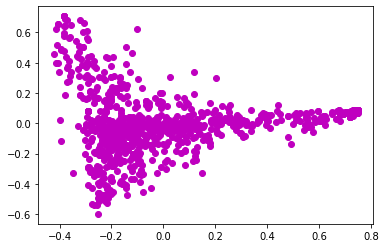

In [9]:
# First we need to make 2D coordinates from the sparse matrix.
X_dense = X.todense()
pca = PCA(n_components=2).fit(X_dense)
coords = pca.transform(X_dense)

plt.scatter(coords[:, 0], coords[:, 1], c='m')
plt.show()

# Lets plot it again, but this time we add some color to it.

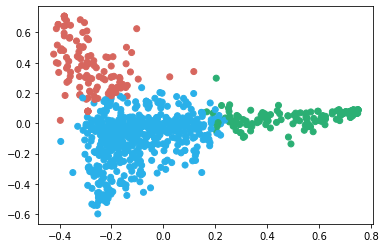

In [10]:
label_colors = ["#2AB0E9", "#2BAF74", "#D7665E", "#CCCCCC", 
                "#D2CA0D", "#522A64", "#A3DB05", "#FC6514"]
colors = [label_colors[i] for i in labels]

plt.scatter(coords[:, 0], coords[:, 1], c=colors)
plt.show()

# Cluster Centers

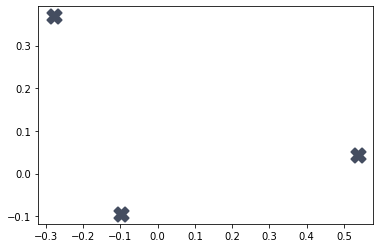

In [11]:
centroids = clf.cluster_centers_
centroid_coords = pca.transform(centroids)
plt.scatter(centroid_coords[:, 0], centroid_coords[:, 1], marker='X', s=200, linewidths=2, c='#444d60')
plt.show()

# Use this to print the top terms per cluster with matplotlib.

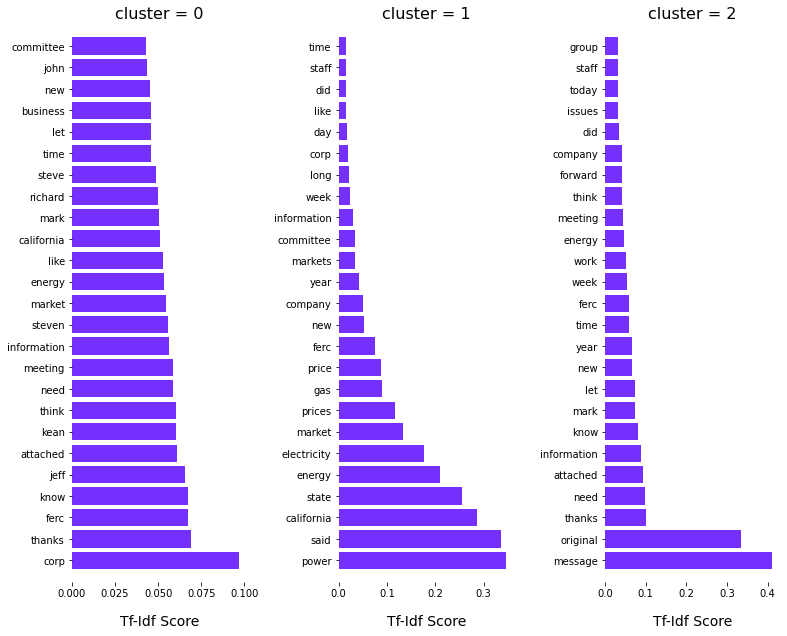

In [12]:
plot_tfidf_classfeats_h(top_feats_per_cluster(X, labels, features, 0.1, 25))

# Part 2

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.metrics.pairwise import linear_kernel
import pandas as pd

from ml_helpers import parse_into_emails
from ml_query import EmailDataset

# Just like in part_1, read and preprocess emails

In [14]:
emails = pd.read_csv('giskard_dataset.csv', delimiter=';') 
email_df = pd.DataFrame(parse_into_emails(emails.Message))
email_df.drop(email_df.query("body == '' | to == '' | from_ == ''").index, inplace=True)

stopwords = ENGLISH_STOP_WORDS.union(['ect', 'hou', 'com', 'recipient'])
vec = TfidfVectorizer(analyzer='word', stop_words=stopwords, max_df=0.3, min_df=2)
vec_train = vec.fit_transform(email_df.body)

# print out the vector of the first email

In [15]:

print(vec_train[0:1])

  (0, 281)	0.12545824630071073
  (0, 17522)	0.12693106739878915
  (0, 11049)	0.09862273536757836
  (0, 4161)	0.12545824630071073
  (0, 12539)	0.20145472425517794
  (0, 7520)	0.10553518854407166
  (0, 7237)	0.0848608427511235
  (0, 9141)	0.09913299668030241
  (0, 22100)	0.06884158223828912
  (0, 19367)	0.06948579964905705
  (0, 15129)	0.09400913615906799
  (0, 20765)	0.10362562217245333
  (0, 23744)	0.13193395420366416
  (0, 17276)	0.07082466464909161
  (0, 9500)	0.12028749340210314
  (0, 22109)	0.08638598336820275
  (0, 5057)	0.07636064539354473
  (0, 24618)	0.08051077559911475
  (0, 17073)	0.12545824630071073
  (0, 22420)	0.11407338525119332
  (0, 29189)	0.07636064539354473
  (0, 23191)	0.10128152013620226
  (0, 12659)	0.10184785841176659
  (0, 23184)	0.06981405063913
  (0, 22949)	0.07471097147867334
  (0, 8258)	0.25091649260142146
  (0, 29883)	0.12656668605276672
  (0, 7861)	0.22814677050238663
  (0, 361)	0.13550312366992354
  (0, 21634)	0.398614267986667
  (0, 21082)	0.3812344233194

# Find cosine similarity between the first email and all others.

In [16]:
cosine_sim = linear_kernel(vec_train[0:1], vec_train).flatten()

# print out the cosine similarities
print(cosine_sim)

[1.         0.         0.01395559 0.0167945  0.         0.02278964
 0.         0.01620356 0.02362332 0.         0.         0.01483774
 0.016145   0.03113387 0.00239628 0.00506042 0.00633972 0.
 0.01180549 0.00126368 0.         0.02362332 0.00189799 0.034295
 0.01434256 0.         0.0027211  0.01137363 0.0729444  0.02346899
 0.         0.00964407 0.03557265 0.01109786 0.01099641 0.013405
 0.         0.04923282 0.00629835 0.01297226 0.00620057 0.
 0.00603131 0.         0.         0.0023792  0.00986685 0.02617178
 0.01354207 0.00424428 0.         0.00952945 0.         0.02951985
 0.00938517 0.         0.03082181 0.00376696 0.01879593 0.03890862
 0.02362332 0.03380021 0.0244264  0.01108647 0.0028276  0.03939493
 0.         0.00499555 0.0052017  0.03480186 0.0126695  0.0037966
 0.00941445 0.02078219 0.00419999 0.00713493 0.01870097 0.
 0.00514785 0.         0.00627522 0.00590706 0.01101416 0.
 0.00445436 0.         0.         0.01205238 0.01222161 0.02951985
 0.         0.00695145 0.0086766

In [17]:
# Finding emails related to a query.
query = "john"

# Transform the query into the original vector
vec_query = vec.transform([query])

cosine_sim = linear_kernel(vec_query, vec_train).flatten()

In [18]:
# Find top 10 most related emails to the query.
related_email_indices = cosine_sim.argsort()[:-10:-1]
# print out the indices of the 10 most related emails.
print(related_email_indices)

# print out the first email 
first_email_index = related_email_indices[0]
print(email_df.body[first_email_index])

[771 637 113 774 162 802 393 458  54]
---------------------- Forwarded by Steven J Kean/NA/Enron on 09/13/2000AM ---------------------------Enron Energy ServicesLaren Dean Tarbet/HOU/EES@EES, Robert Frank/NA/Enron@Enron, Cynthia Sandherr,Peggy Mahoney/HOU/EES@EES, Rick Shapiro, Steve KeanElizabeth Tilney/HOU/EES@EES, Lou Pai, Thomas E White/HOU/EES@EES, DanLeff/HOU/EES@EES, Elizabeth Tilney/HOU/EES@EESSee below.  VEPCO  intends to challenge the USMDW privatization.  Moredetails to come.AM ---------------------------Robert C Williams@ENRON_DEVELOPMENTI have scheduled a meeting with Larry Adams, the Asst. U.S. Attorney, andthat VEPCO has told him that it plans to file a challenge to the GAO'sdecision in the Court of Federal Claims this week.  I have also spoken toAndy Holloman;  we will call him from the Venable office for a "download" onthe Colorado case.Ideas on D.C. counsel?  V&E or Venable are the logical choices;  offhand Iwould propose V&E.
